Import all the required libraries

In [1]:
#Librosa to process sound files
import librosa
from librosa import display
#numpy to create arrays
import numpy
#os to scan internal files
import os
#matplotlib to get spectograms
import matplotlib.pyplot

Define create spectogram function

In [2]:
def create_spectogram(ats, timR):
    spec = librosa.feature.melspectrogram(y=ats, sr = timR)
    spec_convert = librosa.amplitude_to_db(spec, ref=numpy.max)
    return spec_convert

Import a local example to test spectogram function.

In [3]:
sound1 = 'UrbanSound8K/audio/fold1/7061-6-0-0.wav'
ats1, sr1 = librosa.load(sound1)

sound2 = 'UrbanSound8K/audio/fold1/7383-3-0-0.wav'
ats2, sr2 = librosa.load(sound2)

Compare the spectograms that are obtained from different files and see how the length affects

In [4]:
print(f"sound 1 sample rate: {sr1} sound 2 sample rate: {sr2} \nsound 1 atsLength: {len(ats1)} sound 2 atsLength: {len(ats2)}")

sound 1 sample rate: 22050 sound 2 sample rate: 22050 
sound 1 atsLength: 49613 sound 2 atsLength: 88200


Test the spectogram function

In [5]:
spectogram1 = create_spectogram(ats1, sr1)
spectogram2 = create_spectogram(ats2, sr2)

print(f"spectogram1 = {len(spectogram1)} spectogram2 = {len(spectogram2)}")

spectogram1 = 128 spectogram2 = 128


Length of the sounds are different. However, the length of the data is the same. Check the structure of the data for the both files.

In [6]:
print(f"s1 = {spectogram1.shape}, s2 = {spectogram2.shape}")

s1 = (128, 97), s2 = (128, 173)


both files have a list of 128 elements. On the other hand, the content of the list differs. Check what data implies empty space. Turn spectograms into graphs.

C:\Users\goker\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


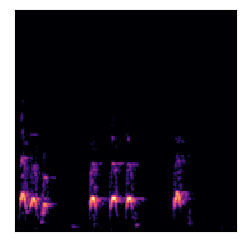

In [7]:
SampRate = 22050 #obtained above

#let's use 256x256 canvas to plot Hz density across the time.
matplotlib.pyplot.rcParams["figure.figsize"] = [2.56, 2.56]
matplotlib.pyplot.rcParams["figure.autolayout"] = True

fig, ax = matplotlib.pyplot.subplots(frameon = False)

img = librosa.display.specshow(spectogram2, x_axis='off', y_axis='off', sr=sr1, fmax=8000, ax=ax)

#plt.savefig("out.png")
#plt.show()

Upper right corner and the lower left corner of the both graph is empty black. By investigating this, we can see what represent black. Check the last five column of the last 5 row to see if the numbers are the same.

In [8]:
print(spectogram1[128-1][len(spectogram1[127])-6:len(spectogram1[127])-1])
print(spectogram1[128-2][len(spectogram1[127])-6:len(spectogram1[127])-1])
print(spectogram1[128-3][len(spectogram1[127])-6:len(spectogram1[127])-1])
print(spectogram1[128-4][len(spectogram1[127])-6:len(spectogram1[127])-1])
print(spectogram1[128-5][len(spectogram1[127])-6:len(spectogram1[127])-1])

[-80. -80. -80. -80. -80.]
[-80. -80. -80. -80. -80.]
[-80. -80. -80. -80. -80.]
[-80. -80. -80. -80. -80.]
[-80. -80. -80. -80. -80.]


Likewise, make the similar test for the spectogram 2

In [9]:
print(spectogram2[128-1][len(spectogram2[127])-6:len(spectogram2[127])-1])
print(spectogram2[128-2][len(spectogram2[127])-6:len(spectogram2[127])-1])
print(spectogram2[128-3][len(spectogram2[127])-6:len(spectogram2[127])-1])
print(spectogram2[128-4][len(spectogram2[127])-6:len(spectogram2[127])-1])
print(spectogram2[128-5][len(spectogram2[127])-6:len(spectogram2[127])-1])

[-80. -80. -80. -80. -80.]
[-80. -80. -80. -80. -80.]
[-80. -80. -80. -80. -80.]
[-80. -80. -80. -80. -80.]
[-80. -80. -80. -80. -80.]


Apparently, blackness in the spectograms are represented with -80. in both graphs. We can adjust the length of the dataset by adding -80. at the end of each spectogram. Otherwise, they would be stretced to fit in a 256x256 frame.

Start by checking the length of the spectograms of all the files.
Find the location of the files in the local drvie.

In [10]:
del spectogram1
del spectogram2

folds = []
fileInfo = []

path = 'UrbanSound8K/audio/'

for item in os.listdir(path):
    if(os.path.isfile(path + item) == False):
        folds.append(path + item)
        
for dirc in folds:
    for fileX in os.listdir(dirc):
        if (fileX[len(fileX)-3:] == 'wav'):
            #Write file path and file name
            curFileInf = [(dirc + "/" + fileX), fileX]
            fileInfo.append(curFileInf)

del folds

Check how many files are there in total

In [11]:
len(fileInfo)

8732

delete garbage data and create the spectograms of all the files.

In [12]:
specs = []
for Sound in fileInfo:
    curAts, curRt = librosa.load(Sound[0])
    curData = [(create_spectogram(curAts, curRt)), Sound[1]]
    specs.append(curData)
    
del fileInfo
    

C:\Users\goker\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\goker\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
C:\Users\goker\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)


Check random spectograms

In [13]:
specs[6546][1]

'165192-9-0-160.wav'

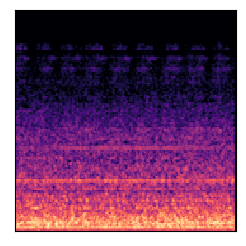

In [28]:
specs[234][1]

spareSpecs = specs

matplotlib.pyplot.rcParams["figure.figsize"] = [2.56, 2.56]
matplotlib.pyplot.rcParams["figure.autolayout"] = True

fig, ax = matplotlib.pyplot.subplots(frameon = False)

img = librosa.display.specshow(specs[245][0], x_axis='off', y_axis='off', sr=SampRate, fmax=8000, ax=ax)

Find the longest spectogram

In [29]:
lengths= []

for spec in spareSpecs:
    lengths.append(len(spec[0][0]))
    
max(lengths)

174

Add -.80 to the end of each spectograms as much as the difference between its length and the longest spectogram

In [30]:
del lengths

for newSpec in spareSpecs:
    additions = []
    difference = 174 - len(newSpec[0][0])
    addSet = []
    if (difference >= 1):
        for i in range(difference):
            additions.append(-80.)
        for t in range(128):
            addSet.append(additions)
            
        newSpec[0] = numpy.append(newSpec[0], addSet, axis=1)

del additions
del addSet

check if all the spectograms have a length of 174

In [31]:
print(len(spareSpecs[7764][0][10]))

174


save spectograms into related folder

In [32]:
for SpecFile in spareSpecs:
    
    categoryAndNext = SpecFile[1][SpecFile[1].find("-")+1:]
    category = categoryAndNext[:categoryAndNext.find("-")]
    
    fileName = SpecFile[1][:SpecFile[1].rfind(".")] + ".png"
    
    matplotlib.pyplot.rcParams["figure.figsize"] = [2.56, 2.56]
    matplotlib.pyplot.rcParams["figure.autolayout"] = True

    fig, ax = matplotlib.pyplot.subplots(frameon = False,)
    fig.frameon = False

    ax = matplotlib.pyplot.Axes(fig, [0, 0, 1, 1])
    ax.set_axis_off()
    fig.add_axes(ax)

    img = librosa.display.specshow(SpecFile[0], x_axis='off', y_axis='off', sr=sr1, fmax=8000, ax=ax)
    matplotlib.pyplot.savefig("Spectograms/" + category + "/" + fileName)
    matplotlib.pyplot.close()

C:\Users\goker\AppData\Local\Temp\ipykernel_8792\3682587047.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  matplotlib.pyplot.savefig("Spectograms/" + category + "/" + fileName)
